[大图](ridge_lasso.html), [下载](origin_files/ridge_lasso.ipynb)  
数据http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 8)

C:\Users\guofei\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn import datasets
dataset=datasets.load_boston()
X=dataset.data
y=dataset.target
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.loc[:,'target']=dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,...,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,...,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,...,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,...,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,...,18.7,396.90,5.33,36.2


In [3]:
df.corr()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,...,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,...,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,...,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,...,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,...,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,...,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,...,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,...,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,...,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,...,0.460853,-0.441808,0.543993,-0.468536


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

## 1. OLS
- sklearn

In [5]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression().fit(X,y)
regr.score(X,y)

0.7406077428649428

In [6]:
regr.predict(X)
regr.coef_#Coefficients

array([-0.92041113,  1.08098058,  0.14296712,  0.68220346, -2.06009246,
        2.67064141,  0.02112063, -3.10444805,  2.65878654, -2.07589814,
       -2.06215593,  0.85664044, -3.74867982])

In [7]:
df1=df.iloc[:,:-1]

In [8]:
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

- statsmodels

In [9]:
lm = ols('target ~ '+'+'.join(dataset.feature_names),data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          6.95e-135
Time:                        16:36:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. 岭回归(ridge)
- sklearn

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge()
alphas = np.logspace(-2, 5, 1000, base=10)
coefs = []
scores=[]
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    scores.append(ridge.score(X,y))

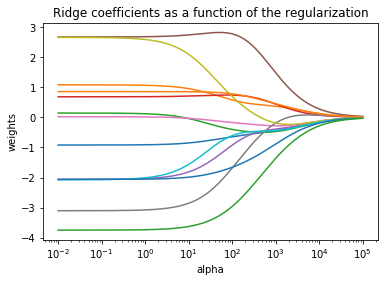

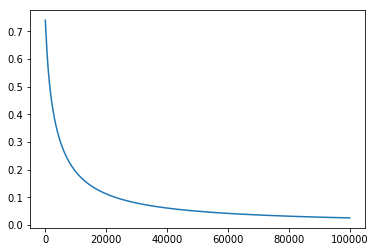

In [11]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

plt.figure()
plt.plot(alphas,scores)

In [12]:
ridge.set_params(alpha=4.67)
ridge.fit(X, y)

Ridge(alpha=4.67, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
ridge.predict(X)
ridge.coef_
ridge.score(X, y)

0.74037953010978874

- statsmodels

In [14]:
lmr = ols('target ~ '+'+'.join(dataset.feature_names),data=df).fit_regularized(alpha=1, L1_wt=0)
lmr.summary()
# L1_wt参数为0则使用岭回归，为1使用lasso

In [15]:
lmr.params

array([ 0.2419258 , -0.08918281,  0.08894527, -0.01606676,  0.23909989,
        0.10083339,  2.43266593,  0.06789319, -0.32134516,  0.13056091,
       -0.00629592,  0.21551788,  0.02400496, -0.66983644])

关于k的选择：
1. 岭迹法
    1. 岭迹到k很稳定了
    2. 没有不合理的回归系数
    3. 合乎实际意义
    4. 残差平方和增加不太多
2. VIF


## 3.  RidgeCV

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(df.iloc[:,:-1])
y = df.loc[:,'target']

In [17]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 5, 1000, base=10)

# Search the min MSE by CV
rcv = RidgeCV(alphas=alphas, store_cv_values=True) 
rcv.fit(X, y)

RidgeCV(alphas=array([  1.00000e-02,   1.01627e-02, ...,   9.83995e+04,   1.00000e+05]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [18]:
rcv.predict(X)
print('The best alpha is {}'.format(rcv.alpha_))
print('The r-square is {}'.format(rcv.score(X, y))) 
# Default score is rsquared
rcv.coef_

The best alpha is 4.673795107992464
The r-square is 0.7403791933204962


array([-0.88475096,  1.01561418,  0.04453904,  0.69631425, -1.93712189,
        2.70710339, -0.00612164, -2.98347258,  2.35961944, -1.79967024,
       -2.0255884 ,  0.8543012 , -3.68987892])

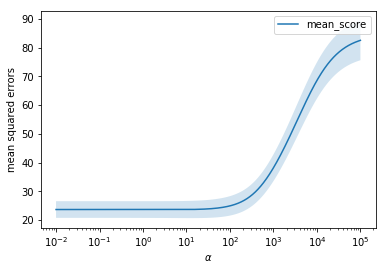

In [19]:
cv_values = rcv.cv_values_
n_fold, n_alphas = cv_values.shape

cv_mean = cv_values.mean(axis=0)
cv_std = cv_values.std(axis=0)
ub = cv_mean + cv_std / np.sqrt(n_fold)
lb = cv_mean - cv_std / np.sqrt(n_fold)

plt.semilogx(alphas, cv_mean, label='mean_score')
plt.fill_between(alphas, lb, ub, alpha=0.2)
plt.xlabel(r"$\alpha$")
plt.ylabel("mean squared errors")
plt.legend(loc="best")
plt.show()

#这个图，最低点最好

## 4. LASSO
- statsmodels

In [20]:
lmr1 = ols('target ~ '+'+'.join(dataset.feature_names),data=df).fit_regularized(alpha=1, L1_wt=1)
lmr1.summary()

- sklearn.lnear_model.LassoCV

In [21]:
from sklearn.linear_model import LassoCV

lasso_alphas = np.logspace(-3, 2, 100, base=10)
lcv = LassoCV(alphas=lasso_alphas, cv=10) # Search the min MSE by CV
lcv.fit(X, y)

print('The best alpha is {}'.format(lcv.alpha_))
print('The r-square is {}'.format(lcv.score(X, y))) 
# Default score is rsquared

The best alpha is 0.1484968262254465
The r-square is 0.7288614391450124


- sklearn.lnear_model.Lasso

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_coefs = []
for alpha in lasso_alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

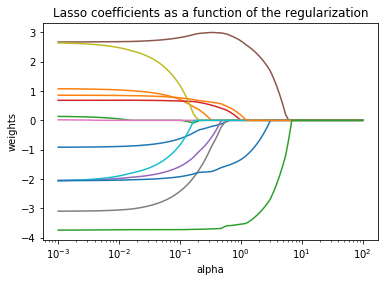

In [23]:
ax = plt.gca()

ax.plot(lasso_alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()